In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
os.chdir('C:\\Post Graduate Course in Data Analytics\\MACHINE LEARNING\\RANDOM FORESTS\\TaxiFarePrediction\\Dataset')

In [3]:
df_taxi=pd.read_csv('TaxiFare.csv')
df_taxi

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [4]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_taxi.drop('unique_id',axis=1,inplace=True)

In [7]:
df_taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
categorical=df_taxi.select_dtypes('object')
numerical=df_taxi.select_dtypes(np.number)
print(categorical.columns)
print(numerical.columns)

Index(['date_time_of_pickup'], dtype='object')
Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger'],
      dtype='object')


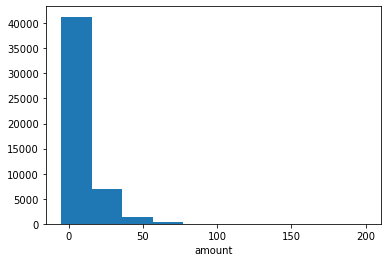

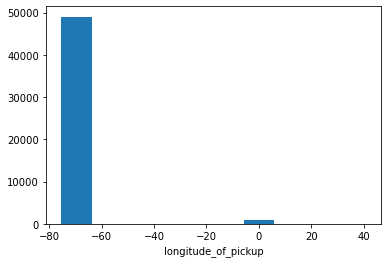

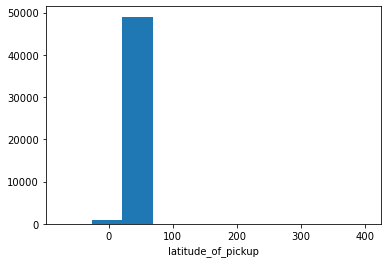

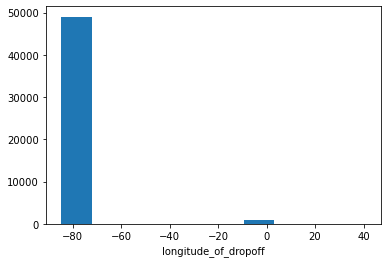

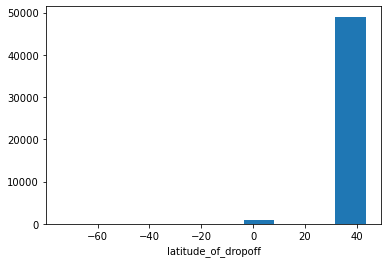

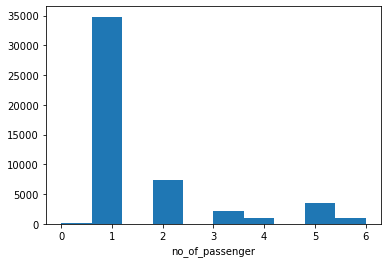

In [9]:
for x in numerical.columns:
    plt.hist(x=x,data=df_taxi)
    plt.xlabel(x)
    plt.show()

In [10]:
df_taxi.date_time_of_pickup.value_counts()

2011-09-03 01:30:00 UTC    3
2014-05-30 23:38:00 UTC    3
2011-02-11 13:19:00 UTC    3
2012-06-28 20:54:00 UTC    3
2010-11-05 23:54:00 UTC    2
                          ..
2011-03-23 19:54:22 UTC    1
2012-09-23 12:25:34 UTC    1
2011-12-06 09:33:35 UTC    1
2011-02-07 16:04:00 UTC    1
2014-05-15 12:33:00 UTC    1
Name: date_time_of_pickup, Length: 49555, dtype: int64

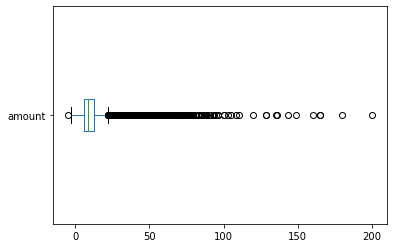

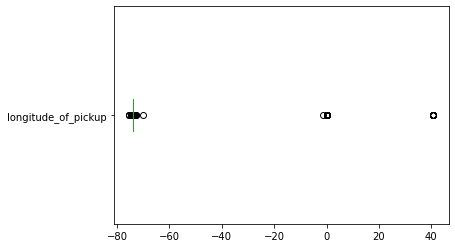

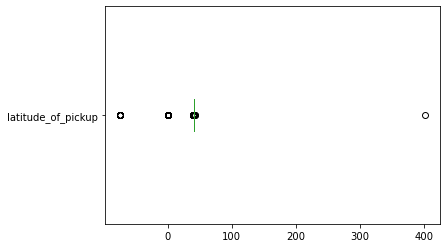

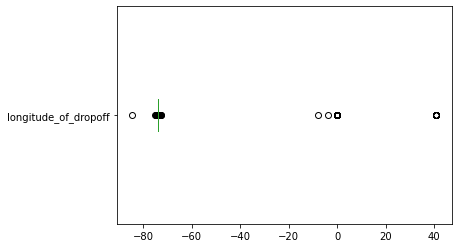

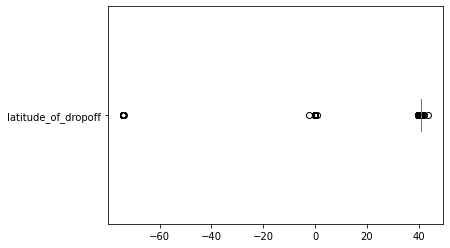

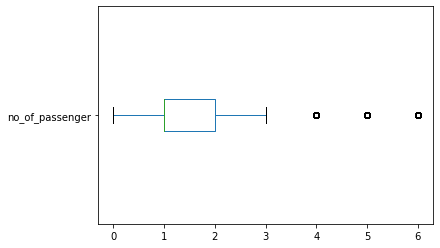

In [11]:
for x in numerical.columns:
    df_taxi[x].plot.box(patch_artist=False,vert=False)
    plt.show()

In [12]:
from scipy import stats

In [13]:
IQR_amt=stats.iqr(df_taxi.amount)
print(IQR_amt)

6.5


In [14]:
uplim=df_taxi.amount.quantile(0.75)+(IQR_amt*1.5)
print(uplim)

22.25


In [15]:
print(len(df_taxi[df_taxi.amount>uplim]))

4364


In [16]:
IQR_pass=stats.iqr(df_taxi.no_of_passenger)
print(IQR_pass)

1.0


In [17]:
uplim1=df_taxi.no_of_passenger.quantile(0.75)+(IQR_pass*1.5)
print(uplim1)

3.5


In [18]:
print(len(df_taxi[df_taxi.no_of_passenger>uplim1]))

5458


In [19]:
df_taxi['date_time_of_pickup']=df_taxi['date_time_of_pickup'].astype('datetime64[ns]')

In [20]:
df_taxi['Year_of_Pickup']=df_taxi.date_time_of_pickup.dt.year

In [21]:
df_taxi['Month_of_Pickup']=df_taxi.date_time_of_pickup.dt.month

In [22]:
df_taxi['Date_of_Pickup']=df_taxi.date_time_of_pickup.dt.day

In [23]:
df_taxi['Hour_of_Pickup']=df_taxi.date_time_of_pickup.dt.hour

In [24]:
df_taxi['Minute_of_Pickup']=df_taxi.date_time_of_pickup.dt.minute

In [25]:
df_taxi['Second_of_Pickup']=df_taxi.date_time_of_pickup.dt.second

In [26]:
df_taxi['Longitudinal_Distance']=df_taxi['longitude_of_pickup']-df_taxi['longitude_of_dropoff']
df_taxi['Latitudinal_Distance']=df_taxi['latitude_of_pickup']-df_taxi['latitude_of_dropoff']

In [61]:
df_taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year_of_Pickup,Month_of_Pickup,Date_of_Pickup,Hour_of_Pickup,Minute_of_Pickup,Second_of_Pickup,Distance_Travelled
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,21,0.640487
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,16,5.250670
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,0,0.863411
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,42,1.739386
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,0,1.242218


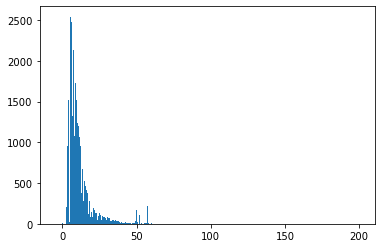

In [28]:
plt.hist(df_taxi.amount,bins='auto')
plt.show()

<AxesSubplot:>

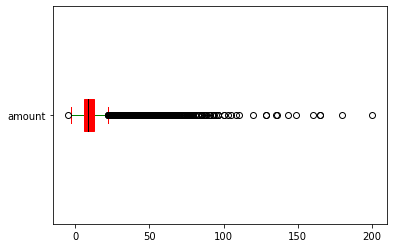

In [29]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_taxi.amount.plot.box(color=props2, patch_artist = True, vert = False)

In [30]:
print(len(df_taxi.amount[df_taxi.amount <0])) #6
print(len(df_taxi.amount[df_taxi.amount >150])) #5
print(len(df_taxi.amount[df_taxi.amount >100])) #16
print(len(df_taxi.amount[df_taxi.amount >50]))

6
5
16
636


In [31]:
for i in range(22,32,1):
    df_len=len(df_taxi.amount[df_taxi.amount>i])
    print('Taxi Fare paid more than', i , 'No of passengers :', df_len)

Taxi Fare paid more than 22 No of passengers : 4413
Taxi Fare paid more than 23 No of passengers : 4092
Taxi Fare paid more than 24 No of passengers : 3828
Taxi Fare paid more than 25 No of passengers : 3576
Taxi Fare paid more than 26 No of passengers : 3336
Taxi Fare paid more than 27 No of passengers : 3096
Taxi Fare paid more than 28 No of passengers : 2931
Taxi Fare paid more than 29 No of passengers : 2724
Taxi Fare paid more than 30 No of passengers : 2581
Taxi Fare paid more than 31 No of passengers : 2380


In [32]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   amount                 50000 non-null  float64       
 1   date_time_of_pickup    50000 non-null  datetime64[ns]
 2   longitude_of_pickup    50000 non-null  float64       
 3   latitude_of_pickup     50000 non-null  float64       
 4   longitude_of_dropoff   50000 non-null  float64       
 5   latitude_of_dropoff    50000 non-null  float64       
 6   no_of_passenger        50000 non-null  int64         
 7   Year_of_Pickup         50000 non-null  int64         
 8   Month_of_Pickup        50000 non-null  int64         
 9   Date_of_Pickup         50000 non-null  int64         
 10  Hour_of_Pickup         50000 non-null  int64         
 11  Minute_of_Pickup       50000 non-null  int64         
 12  Second_of_Pickup       50000 non-null  int64         
 13  L

In [33]:
df_taxi.drop(['Longitudinal_Distance','Latitudinal_Distance'],axis=1,inplace=True)

In [34]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   amount                50000 non-null  float64       
 1   date_time_of_pickup   50000 non-null  datetime64[ns]
 2   longitude_of_pickup   50000 non-null  float64       
 3   latitude_of_pickup    50000 non-null  float64       
 4   longitude_of_dropoff  50000 non-null  float64       
 5   latitude_of_dropoff   50000 non-null  float64       
 6   no_of_passenger       50000 non-null  int64         
 7   Year_of_Pickup        50000 non-null  int64         
 8   Month_of_Pickup       50000 non-null  int64         
 9   Date_of_Pickup        50000 non-null  int64         
 10  Hour_of_Pickup        50000 non-null  int64         
 11  Minute_of_Pickup      50000 non-null  int64         
 12  Second_of_Pickup      50000 non-null  int64         
dtypes: datetime64[ns

<AxesSubplot:xlabel='Year_of_Pickup', ylabel='count'>

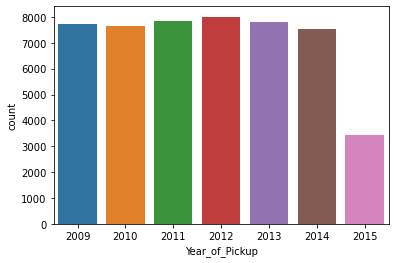

In [35]:
sns.countplot(x='Year_of_Pickup',data=df_taxi)

In [36]:
df_taxi.Year_of_Pickup.value_counts()

2012    8005
2011    7832
2013    7819
2009    7716
2010    7646
2014    7530
2015    3452
Name: Year_of_Pickup, dtype: int64

<AxesSubplot:>

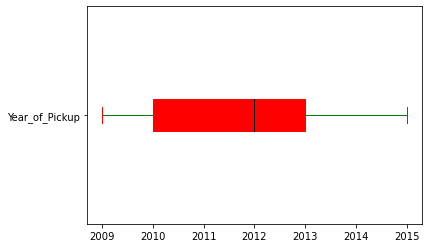

In [37]:
props2=dict(boxes='red',whiskers='green',medians='black',caps='red')
df_taxi.Year_of_Pickup.plot.box(color=props2,patch_artist=True,vert=False)

In [38]:
df_taxi.groupby('Year_of_Pickup')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Year_of_Pickup,,,,,,,,
2009,7716.0,10.049168,8.447096,2.5,5.7,7.7,11.3,165.00
2010,7646.0,10.137180,8.406004,-2.9,5.7,7.7,11.3,143.00
2011,7832.0,10.465931,8.467032,2.5,5.7,7.7,11.7,96.00
2012,8005.0,11.228863,9.667937,2.5,6.0,8.5,12.5,200.00
2013,7819.0,12.439474,10.428842,-3.0,6.5,9.5,14.0,180.00
2014,7530.0,13.139649,11.311478,2.5,6.5,9.5,15.0,165.00
2015,3452.0,13.064392,10.799374,-5.0,6.5,9.5,15.0,96.25


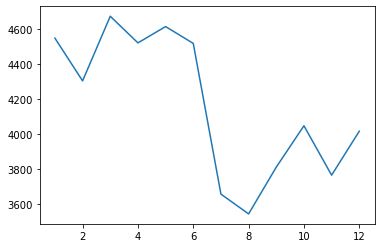

In [39]:
plt.plot(df_taxi.groupby('Month_of_Pickup')['amount'].count())
plt.show()

In [41]:
df_taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year_of_Pickup,Month_of_Pickup,Date_of_Pickup,Hour_of_Pickup,Minute_of_Pickup,Second_of_Pickup
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,21
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,16
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,42
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,0


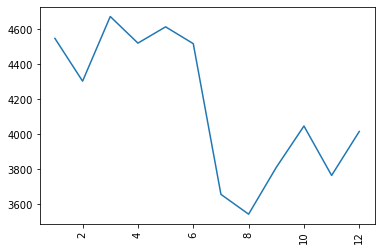

In [42]:
plt.plot(df_taxi.groupby('Month_of_Pickup')['amount'].count())
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Date_of_Pickup', ylabel='count'>

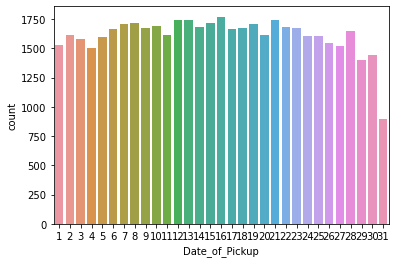

In [43]:
sns.countplot(x='Date_of_Pickup',data=df_taxi)

<AxesSubplot:xlabel='Hour_of_Pickup', ylabel='count'>

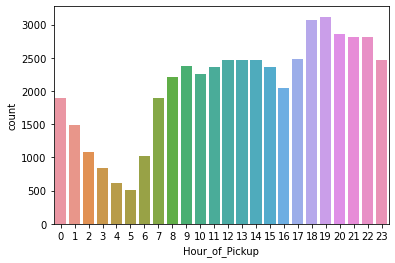

In [44]:
sns.countplot(x='Hour_of_Pickup',data=df_taxi)

<AxesSubplot:>

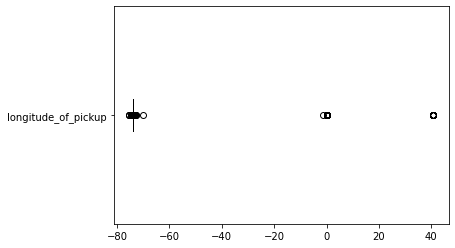

In [45]:
df_taxi.longitude_of_pickup.plot.box(color=props2,patch_artist=True,vert=False)

In [46]:
IQR_long=stats.iqr(df_taxi.longitude_of_pickup)
IQR_long

0.02491399999999544

In [47]:
lowlim = df_taxi.longitude_of_pickup.quantile(0.25)-(1.5*IQR_long)
lowlim

-74.029433

In [48]:
uplim = df_taxi.longitude_of_pickup.quantile(0.75)+(1.5*IQR_long)
uplim

-73.92977700000002

In [49]:
print(len(df_taxi[df_taxi.longitude_of_pickup>uplim]))

3367


In [50]:
print(len(df_taxi[df_taxi.longitude_of_pickup<lowlim]))

62


In [51]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   amount                50000 non-null  float64       
 1   date_time_of_pickup   50000 non-null  datetime64[ns]
 2   longitude_of_pickup   50000 non-null  float64       
 3   latitude_of_pickup    50000 non-null  float64       
 4   longitude_of_dropoff  50000 non-null  float64       
 5   latitude_of_dropoff   50000 non-null  float64       
 6   no_of_passenger       50000 non-null  int64         
 7   Year_of_Pickup        50000 non-null  int64         
 8   Month_of_Pickup       50000 non-null  int64         
 9   Date_of_Pickup        50000 non-null  int64         
 10  Hour_of_Pickup        50000 non-null  int64         
 11  Minute_of_Pickup      50000 non-null  int64         
 12  Second_of_Pickup      50000 non-null  int64         
dtypes: datetime64[ns

In [52]:
def distance(lat1,lon1,lat2,lon2):
    p=0.017453292519943295
    a=0.5-np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p)*(1-np.cos((lon2-lon1)*p))/2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))
df_taxi['Distance_Travelled']=distance(df_taxi.latitude_of_pickup,df_taxi.longitude_of_pickup,
                                      df_taxi.latitude_of_dropoff,df_taxi.longitude_of_dropoff)
df_taxi['Distance_Travelled'].head()

0    0.640487
1    5.250670
2    0.863411
3    1.739386
4    1.242218
Name: Distance_Travelled, dtype: float64

C:\Users\soume\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance_Travelled', ylabel='amount'>

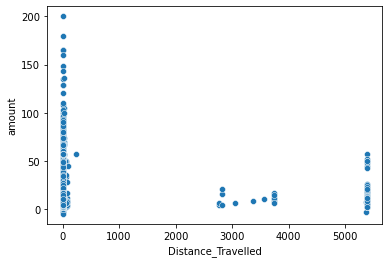

In [53]:
sns.scatterplot(df_taxi.Distance_Travelled,df_taxi.amount)

In [54]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [55]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   amount                50000 non-null  float64       
 1   date_time_of_pickup   50000 non-null  datetime64[ns]
 2   longitude_of_pickup   50000 non-null  float64       
 3   latitude_of_pickup    50000 non-null  float64       
 4   longitude_of_dropoff  50000 non-null  float64       
 5   latitude_of_dropoff   50000 non-null  float64       
 6   no_of_passenger       50000 non-null  int64         
 7   Year_of_Pickup        50000 non-null  int64         
 8   Month_of_Pickup       50000 non-null  int64         
 9   Date_of_Pickup        50000 non-null  int64         
 10  Hour_of_Pickup        50000 non-null  int64         
 11  Minute_of_Pickup      50000 non-null  int64         
 12  Second_of_Pickup      50000 non-null  int64         
 13  Distance_Travell

In [82]:
x=df_taxi.iloc[:,3:14]
print(x.info())
y=df_taxi.iloc[:,0]
print(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   latitude_of_pickup    50000 non-null  float64
 1   longitude_of_dropoff  50000 non-null  float64
 2   latitude_of_dropoff   50000 non-null  float64
 3   no_of_passenger       50000 non-null  int64  
 4   Year_of_Pickup        50000 non-null  int64  
 5   Month_of_Pickup       50000 non-null  int64  
 6   Date_of_Pickup        50000 non-null  int64  
 7   Hour_of_Pickup        50000 non-null  int64  
 8   Minute_of_Pickup      50000 non-null  int64  
 9   Second_of_Pickup      50000 non-null  int64  
 10  Distance_Travelled    50000 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 4.2 MB
None
0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49995    15.0
49996     7.5
49997     6.9
49998     4.5
49999    10.9
Name: amount, Lengt

In [83]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=101)

In [84]:
clf=tree.DecisionTreeRegressor()
clffit=clf.fit(xtrain,ytrain)

In [85]:
ypred=clffit.predict(xtest)

In [86]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
print(rmse)

6.853756365186418


In [87]:
rfr=RandomForestRegressor(n_estimators=300)
rfrfit=rfr.fit(xtrain,ytrain)

In [88]:
ypred1=rfrfit.predict(xtest)

In [89]:
mse1=mean_squared_error(ytest,ypred1)
rmse1=np.sqrt(mse1)
rmse1

4.8049406395617345

In [90]:
df_taxi.to_csv('taxifare.csv',index=False)

In [91]:
df1=pd.read_csv('taxifare.csv')
df1=df1.sample(100,random_state=21)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 26733 to 46916
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                100 non-null    float64
 1   date_time_of_pickup   100 non-null    object 
 2   longitude_of_pickup   100 non-null    float64
 3   latitude_of_pickup    100 non-null    float64
 4   longitude_of_dropoff  100 non-null    float64
 5   latitude_of_dropoff   100 non-null    float64
 6   no_of_passenger       100 non-null    int64  
 7   Year_of_Pickup        100 non-null    int64  
 8   Month_of_Pickup       100 non-null    int64  
 9   Date_of_Pickup        100 non-null    int64  
 10  Hour_of_Pickup        100 non-null    int64  
 11  Minute_of_Pickup      100 non-null    int64  
 12  Second_of_Pickup      100 non-null    int64  
 13  Distance_Travelled    100 non-null    float64
dtypes: float64(6), int64(7), object(1)
memory usage: 11.7+ KB


In [92]:
x1=df1.iloc[:,2:14]
y1=df1.iloc[:,0]
print(y1.shape)
print(x1.shape)

(100,)
(100, 12)


In [93]:
rfr1=RandomForestRegressor()
df_rfr1=rfr1.fit(x1,y1)

In [94]:
ypred1=df_rfr1.predict(x1)
ypred1

array([41.7772, 30.1279, 10.367 ,  4.963 ,  7.486 ,  8.727 , 15.741 ,
        9.833 , 16.1681,  3.997 ,  7.0174,  5.244 , 10.357 ,  7.102 ,
        9.675 ,  8.644 ,  7.068 , 13.676 , 13.745 ,  6.4744,  3.931 ,
        9.254 , 12.894 ,  6.984 ,  8.252 ,  3.479 ,  7.411 ,  6.164 ,
        6.326 , 33.3526,  9.137 ,  5.127 , 14.307 ,  4.856 , 17.356 ,
       10.616 , 18.5799, 16.8677,  7.607 , 24.105 , 16.0344, 14.357 ,
        6.825 ,  7.533 ,  6.895 , 11.184 , 17.3   , 15.439 ,  9.713 ,
        7.67  ,  8.368 , 16.957 ,  9.194 ,  7.887 ,  8.191 ,  8.865 ,
       15.6272, 28.0661, 15.8001,  6.485 , 13.415 , 12.8467, 11.79  ,
        9.182 ,  6.98  , 15.6304,  9.815 ,  6.9088, 10.892 ,  6.848 ,
        7.726 , 15.841 , 17.141 , 16.298 , 11.927 , 10.568 ,  5.733 ,
       15.2732,  7.75  ,  7.138 , 49.6364, 18.3247,  7.923 , 18.2574,
        8.378 ,  7.717 ,  7.857 , 17.8768, 11.166 , 12.5588, 26.3403,
        4.468 ,  6.488 ,  6.421 , 32.241 ,  8.976 ,  4.133 ,  4.18  ,
       12.545 , 32.1

In [95]:
mse1=mean_squared_error(y1,ypred1)
rmse1=np.sqrt(mse1)
rmse1

2.298028831542373

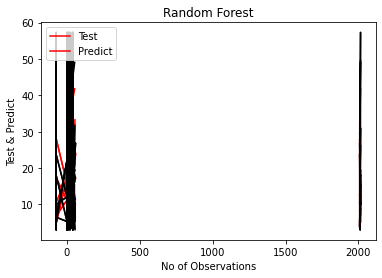

In [96]:
plt.plot(x1, ypred1, 'r')
plt.plot(x1, y1, 'black')
plt.xlabel('No of Observations')
plt.ylabel('Test & Predict')
plt.title('Random Forest')
plt.legend(labels= ('Test', 'Predict'), loc= 'upper left')
plt.show()

In [97]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=300,num=3)]
max_features=['auto','sqrt']
max_depth=[2,5]
min_samples_split=[10,20]
min_samples_leaf=[5,10]
bootstrap=[True,False]

In [98]:
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
            'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5], 'min_samples_split': [10, 20], 'min_samples_leaf': [5, 10], 'bootstrap': [True, False]}


In [99]:
from sklearn.model_selection import GridSearchCV
rfr_grid=GridSearchCV(estimator=rfr1,param_grid=param_grid,cv=3,n_jobs=4)
rfr_grid_gs=rfr_grid.fit(x1,y1)

In [100]:
rfr_grid_gs.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 200}

In [102]:
ypred2=rfr_grid_gs.predict(x1)
ypred2

array([28.74373508, 30.00501069, 13.03069647,  4.94518467,  8.58468276,
        8.57417065, 16.32785456,  8.83358262, 21.15125087,  4.75009606,
        7.66956901,  4.78431096,  9.30915831,  6.7443503 , 10.84102403,
        8.78920058,  6.86134246, 14.75689408, 15.65739148,  8.20887583,
        4.72681068,  9.42345992, 13.56066548,  6.85073784,  9.61034851,
        5.33735213,  8.40095465,  7.28965878,  6.67478165, 30.00501069,
        9.18122823,  5.07678627, 14.63207417,  4.7458883 , 15.91800378,
        9.5465    , 19.73061831, 20.10074092,  9.10408306, 13.08612053,
       15.92640691, 12.70335006,  7.81104491,  8.49633604,  6.94049816,
       15.935     , 16.59062264, 16.33486269,  8.85232077,  8.58761029,
        6.81461537, 15.7357863 ,  9.3234349 ,  7.165243  ,  8.92577138,
        7.92933991, 16.79847189, 27.6125954 , 24.00481346,  6.58423087,
       11.57440654, 12.65896533, 10.34702799,  9.991452  ,  8.95434229,
       15.90044487,  8.51890052,  8.4805641 , 12.21529937,  6.83

In [103]:
mse2=mean_squared_error(y1,ypred2)
rmse2=np.sqrt(mse2)
print(rmse2)

5.576772977335376


In [104]:
x2=df1.iloc[:,6:14]
y2=df1.iloc[:,0]

In [105]:
rfr2=RandomForestRegressor()
df_rfr2=rfr2.fit(x2,y2)

In [106]:
ypredict=df_rfr2.predict(x2)
ypredict

array([43.3524, 29.4414, 10.497 ,  5.069 ,  7.09  ,  8.848 , 15.6188,
       11.0767, 15.7194,  4.142 ,  5.289 ,  5.279 ,  9.839 ,  7.058 ,
        9.768 ,  8.815 ,  6.973 , 13.516 , 14.363 ,  5.272 ,  3.654 ,
        9.906 , 12.2718,  6.814 ,  8.992 ,  6.076 ,  7.431 ,  6.544 ,
        6.451 , 32.5293,  9.587 ,  5.286 , 14.2434,  5.124 , 19.047 ,
       11.8588, 18.354 , 16.7657,  7.211 , 25.084 , 15.8674, 13.653 ,
        6.753 ,  7.906 ,  6.811 , 10.354 , 17.386 , 15.327 ,  9.966 ,
        7.999 ,  8.865 , 18.0582,  9.842 ,  8.008 ,  8.71  ,  8.91  ,
       15.888 , 28.7439, 15.5614,  7.617 , 12.99  , 11.647 , 11.365 ,
        8.982 ,  5.99  , 16.2961,  9.78  ,  4.74  , 10.647 ,  6.871 ,
        8.35  , 15.8457, 17.7058, 16.6147, 12.208 , 10.398 ,  5.704 ,
       14.201 ,  7.373 ,  7.138 , 48.5118, 18.076 ,  8.069 , 18.469 ,
        8.685 ,  7.654 ,  7.592 , 17.7358, 10.013 , 11.539 , 25.0018,
        5.144 ,  5.278 ,  5.78  , 34.933 ,  7.15  ,  4.292 ,  4.21  ,
       12.7314, 32.5

In [107]:
mse3=mean_squared_error(y2,ypredict)
rmse3=np.sqrt(mse3)
rmse3

2.1907246245706027

In [108]:
rfr_grid=GridSearchCV(estimator=rfr2,param_grid=param_grid,cv=3,n_jobs=4)
rfr_grid_gs=rfr_grid.fit(x2,y2)

In [109]:
ypredict1=rfr_grid_gs.predict(x2)
ypredict1

array([40.034     , 40.034     ,  8.85135135,  8.85135135,  8.85135135,
        8.85135135, 17.08761905,  8.85135135, 17.08761905,  8.85135135,
        8.85135135,  8.85135135,  8.85135135,  8.85135135,  8.85135135,
        8.85135135,  8.85135135, 17.08761905, 17.08761905,  8.85135135,
        8.85135135,  8.85135135,  8.85135135,  8.85135135,  8.85135135,
        8.85135135,  8.85135135,  8.85135135,  8.85135135, 40.034     ,
        8.85135135,  8.85135135, 17.08761905,  8.85135135,  8.85135135,
        8.85135135, 17.08761905, 17.08761905,  8.85135135,  8.85135135,
       17.08761905,  8.85135135,  8.85135135,  8.85135135,  8.85135135,
        8.85135135, 17.08761905, 17.08761905,  8.85135135,  8.85135135,
        8.85135135, 17.08761905,  8.85135135,  8.85135135,  8.85135135,
        8.85135135,  8.85135135, 17.08761905, 17.08761905,  8.85135135,
        8.85135135,  8.85135135,  8.85135135,  8.85135135,  8.85135135,
       17.08761905,  8.85135135,  8.85135135,  8.85135135,  8.85

In [110]:
mse4=mean_squared_error(y2,ypredict1)
rmse4=np.sqrt(mse4)
print(rmse4)

5.939159676096649
